# Processor to crop and register multiplane data
* input:
  *  path: path to 3D or 4D stack in tiff format
  *  calpath: path to calibration file
  *    
* output:
  *  4D stack, order
  *  calibration file
  *  processing log file


In [1]:
from multiplane import MultiplaneProcess
# Initialize the MultiplaneProcess class

In [2]:
proc = MultiplaneProcess()# choose path via gui or direct input  
proc.select_data_directory()

'D:/moritz/Technical_paper/4x2/20250909_STORM_HS597/PS_e642nm_dz25nm_dt50ms_4'

In [3]:
# get metadata if present
proc.get_files_with_metadata()
proc.get_metadata()
proc.update_metadata()

Updated zstage displacement per frame to: 25.0 nm
Updated global ROI to:  [1075, 1650, 2000, 460]
Updated pixelsize to:  108.0


In [ ]:
proc.P['nplanes']= 8
#proc.P['order_default']= [3,2,1,0,4,5,6,7] 
proc.P['use_projection'] = 'min' #'median' 
proc.th_weight = 0.1
proc.i_corr = True # do not apply intensity correction
proc.P['padding'] = -60 
proc.P["apply_transform"]= True
proc.deskew_cam = False

In [5]:
# activate logging
proc.set_logging(True)

Read image PS_e642nm_dz25nm_dt50ms_4_MMStack_Pos0.ome.tif; size (802, 460, 2000); type uint16
Using global ROI [1075, 1650, 2000, 460] from parameters, might be erroneous due to missing metadata
Using global ROI [1075, 1650, 2000, 460] from parameters, might be erroneous due to missing metadata
Adaptive thresholding cam 0..


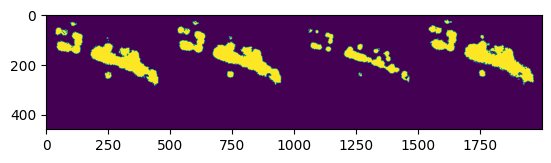

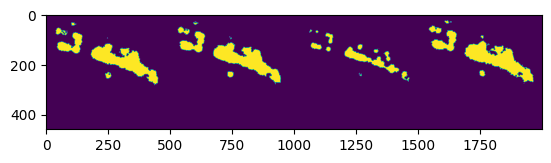

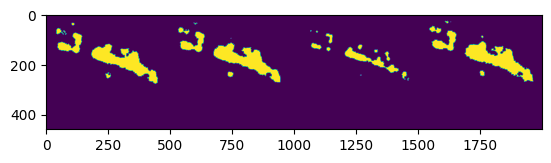

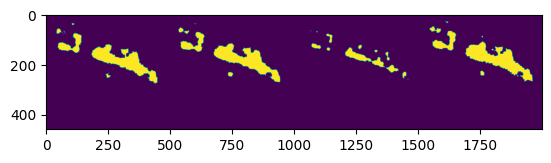

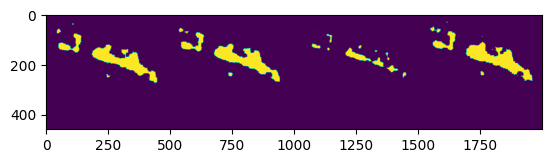

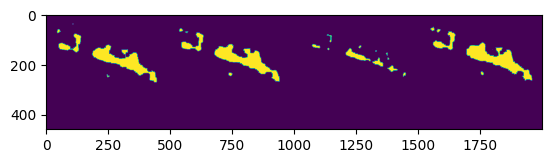

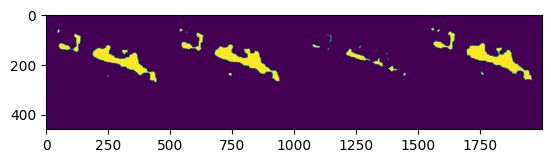

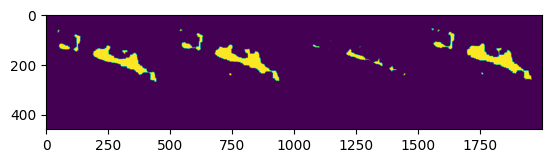

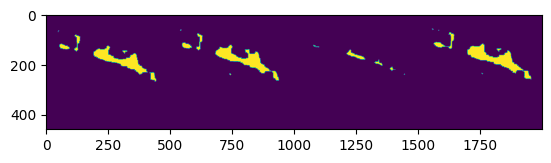

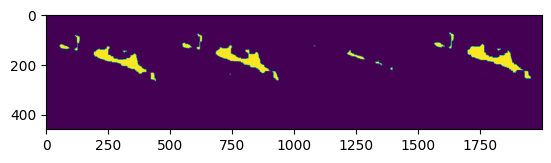

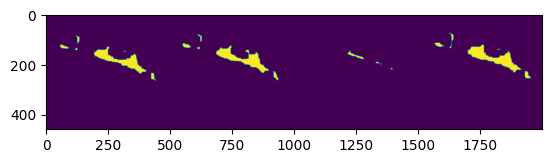

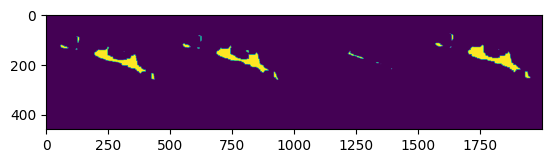

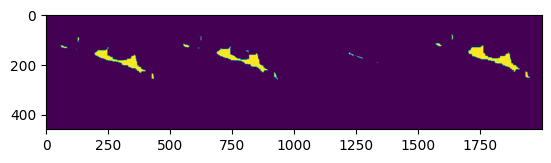

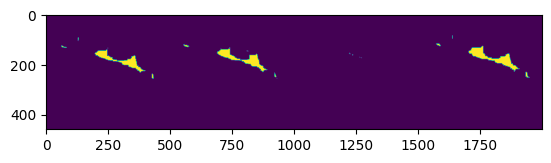

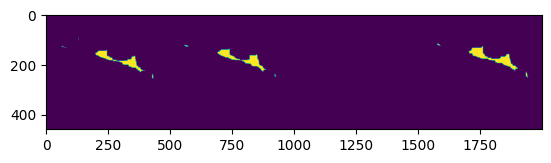

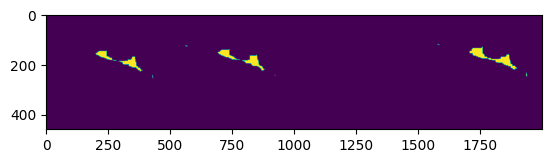

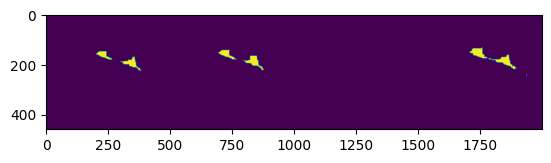

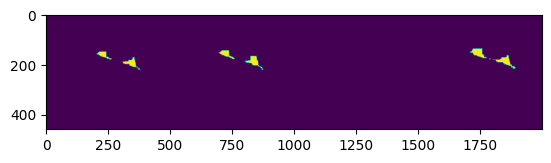

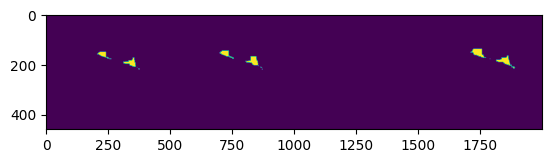

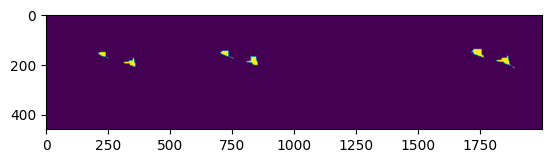

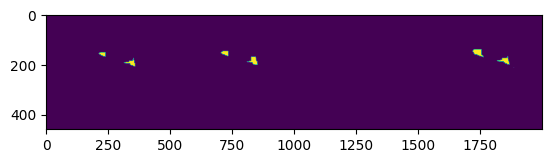

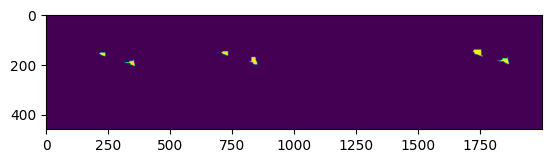

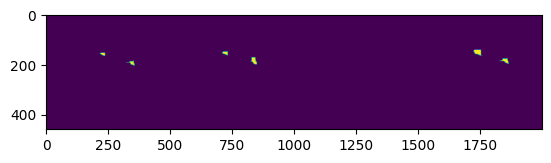

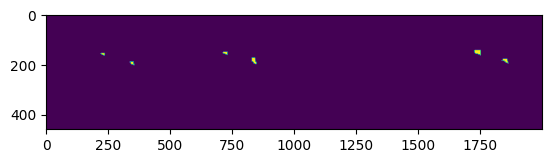

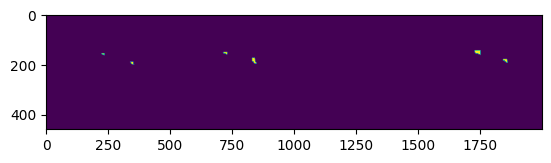

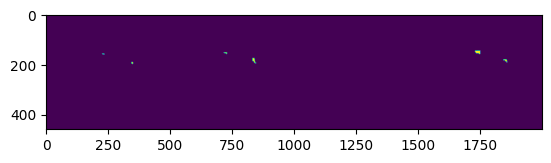

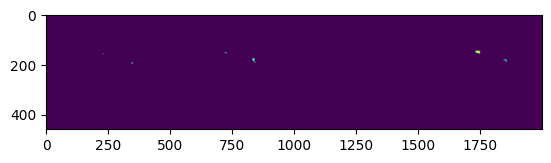

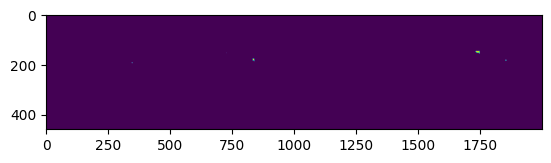

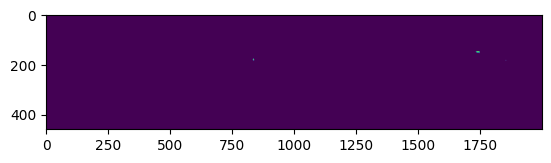

KeyboardInterrupt: 

In [8]:
proc.calibrate(is_bead = True)

In [ ]:
proc.calibrate_sml()

In [ ]:
proc.load_calibration()


In [ ]:
proc.save_individual = True
proc.save_in_subfolders = False # save each plane in a separate subfolder
proc.P['apply_transform'] = False
proc.P['dF_batch']= 1000#frames, framebatch_size default 
proc.execute()